In [12]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd

#Load dataset
#iris = datasets.load_iris()
data = pd.read_csv("dataset1.csv ", header = 0)
#print(iris)
#data.head()


In [13]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#dal mio dataset vado a separare le colonne
#X=data[["tipologia(verdura,frutta,pesce,carne,casa,elettronica)","stagione","zona supermercato(periferia,residenziale)","festività(Feriale,Lavorativo)","scadenza(breve,media,lunga)","dimensione confezione(piccola,media,grande)","acquisto passato(numero)","costo(prezzo)","spedizione(prezzo)"]]  # Features
y=data["fornitura(20-50-100-150-200-300-500)"]  # Labels
#converte le stringhe in set di boolean, altrimenti non si puo fare fit(One-hot encode)
X = pd.get_dummies(data[["tipologia(verdura,frutta,pesce,carne,casa,elettronica)","stagione","zona supermercato(periferia,residenziale)","festività(Feriale,Lavorativo)","scadenza(breve,media,lunga)","dimensione confezione(piccola,media,grande)","costo(prezzo)","spedizione(prezzo)"]])
#print(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
#print(X_test,y_test)

In [14]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier, alberi dispari
clf=RandomForestClassifier(n_estimators=99)

#bootstrap=vengono utilizzati sottinsieme di variabili, random_state=sottinsiemi di variabili casuali
#clf=RandomForestClassifier(n_estimators=99,bootstrap=True,random_state=0)


#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
#print(X_test)

#res=clf.predict([[10,7,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0]])
#print(res)

In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print(y_test, y_pred)

Accuracy: 0.9365079365079365


In [16]:
#feature_names=["tipologia(verdura,frutta,pesce,carne,casa,elettronica)","stagione","zona supermercato(periferia,residenziale)","festività(Feriale,Lavorativo)","scadenza(breve,media,lunga)","dimensione confezione(piccola,media,grande)","acquisto passato(numero)","costo(prezzo)","spedizione(prezzo)","x","x","x","x"]
#print(clf.feature_importances_)

#in formato dataframe
#feature_imp=pd.DataFrame({'col_name': clf.feature_importances_}, index=X.columns).sort_values(by='col_name', ascending=False)
#feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)

#Series rappresenta dati 1D, come le serie temporali
#DataFrame rappresenta dati 2D, praticamente qualunque insieme di dati in forma tabellare
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

#0 perché nel dataset è sempre uguale

costo(prezzo)                                                         0.339270
spedizione(prezzo)                                                    0.118112
festività(Feriale,Lavorativo)_Feriale                                 0.078375
festività(Feriale,Lavorativo)_Lavorativo                              0.069320
dimensione confezione(piccola,media,grande)_Media                     0.055618
zona supermercato(periferia,residenziale)_Residenziale                0.045550
zona supermercato(periferia,residenziale)_Periferia                   0.043561
dimensione confezione(piccola,media,grande)_Piccola                   0.042201
scadenza(breve,media,lunga)_Lunga                                     0.039392
scadenza(breve,media,lunga)_Media                                     0.037875
dimensione confezione(piccola,media,grande)_Grande                    0.035069
stagione_Primavera                                                    0.026036
stagione_Autunno                                    

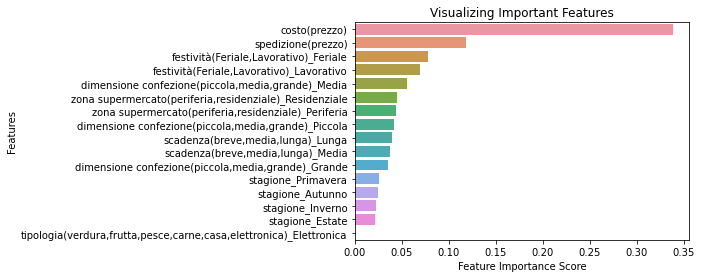

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [18]:
#Aggreghiamo le stesse variabili

feature_imp1=feature_imp.copy()
feature_imp1

feature_imp1["festività"]=feature_imp1["festività(Feriale,Lavorativo)_Lavorativo"]+feature_imp1["festività(Feriale,Lavorativo)_Feriale"]
feature_imp1=feature_imp1.drop(labels=['festività(Feriale,Lavorativo)_Lavorativo','festività(Feriale,Lavorativo)_Feriale'])

feature_imp1["dimensione confezione"]=feature_imp1["dimensione confezione(piccola,media,grande)_Media"]+feature_imp1["dimensione confezione(piccola,media,grande)_Piccola"]+feature_imp1["dimensione confezione(piccola,media,grande)_Grande"]
feature_imp1=feature_imp1.drop(labels=['dimensione confezione(piccola,media,grande)_Media','dimensione confezione(piccola,media,grande)_Piccola','dimensione confezione(piccola,media,grande)_Grande'])

feature_imp1["zona supermercato"]=feature_imp1["zona supermercato(periferia,residenziale)_Periferia"]+feature_imp1["zona supermercato(periferia,residenziale)_Residenziale"]
feature_imp1=feature_imp1.drop(labels=['zona supermercato(periferia,residenziale)_Residenziale','zona supermercato(periferia,residenziale)_Periferia'])

feature_imp1["scadenza"]=feature_imp1["scadenza(breve,media,lunga)_Media"]+feature_imp1["scadenza(breve,media,lunga)_Lunga"]
feature_imp1=feature_imp1.drop(labels=['scadenza(breve,media,lunga)_Media','scadenza(breve,media,lunga)_Lunga'])

feature_imp1["stagione"]=feature_imp1["stagione_Primavera"]+feature_imp1["stagione_Estate"]+feature_imp1["stagione_Autunno"]+feature_imp1["stagione_Inverno"]
feature_imp1=feature_imp1.drop(labels=['stagione_Inverno','stagione_Estate','stagione_Primavera','stagione_Autunno'])


feature_imp1.sort_values(ascending=False)

costo(prezzo)                                                         0.339270
festività                                                             0.147695
dimensione confezione                                                 0.132889
spedizione(prezzo)                                                    0.118112
stagione                                                              0.095657
zona supermercato                                                     0.089110
scadenza                                                              0.077267
tipologia(verdura,frutta,pesce,carne,casa,elettronica)_Elettronica    0.000000
dtype: float64

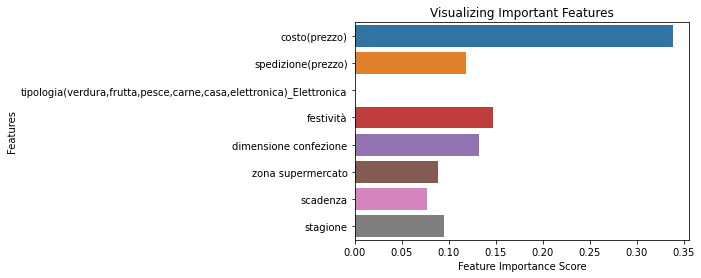

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp1, y=feature_imp1.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [20]:
# Tools per la visualizzazione
from sklearn.tree import export_graphviz
import pydot

# Prendiamo un albero dalla foresta
tree = clf.estimators_[5]

feature_list=list(X.columns)
# Esportiamo l'immagine
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Usiamo un file dot per salvare l'immagine
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Trasformiamo in png
graph.write_png('tree.png')

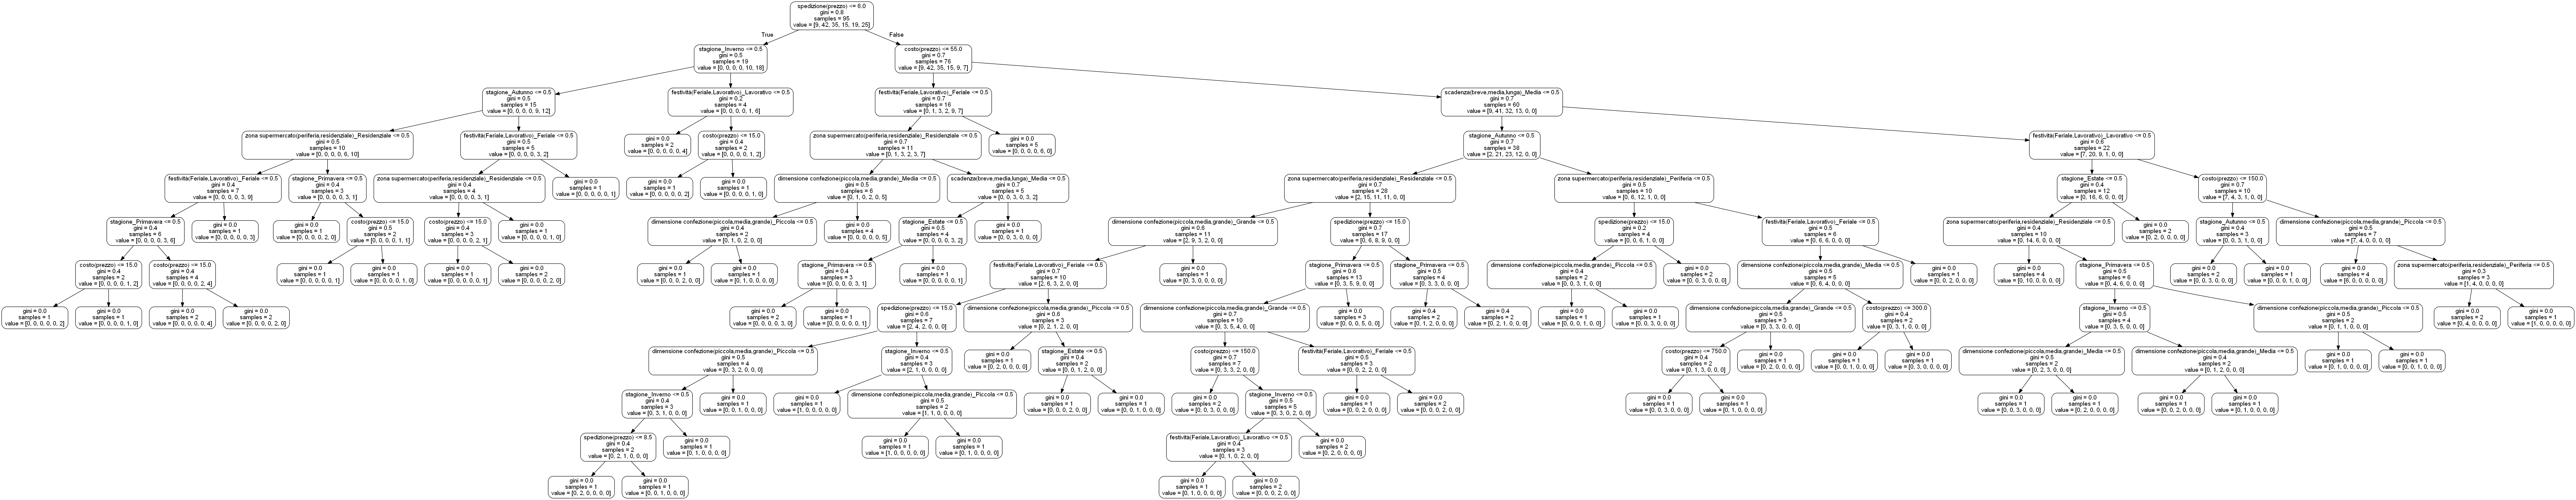

In [21]:
from IPython.display import Image
Image(filename='tree.png') 

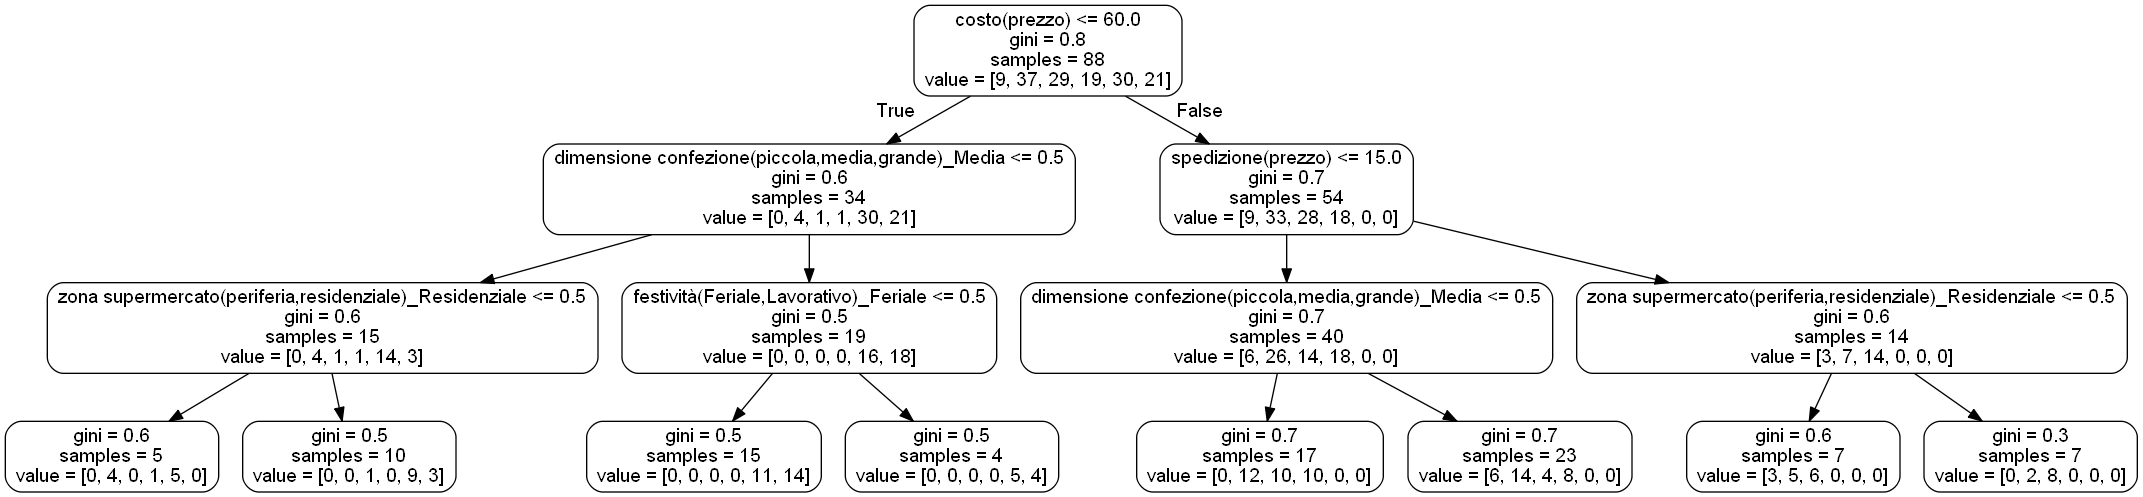

In [22]:
# Limitiamo la profondità a 3 livelli
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(X_train,y_train)

# Estraiamo l'albero ridotto
tree_small = rf_small.estimators_[5]

# Salviamo come png
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

# Mostriamo
Image(filename='small_tree.png')